## RQ3: AFFECTIVE STATE

In [1]:
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from run_stats import *

### SURVEYS

In [2]:
survey_data = pd.read_excel("Experimental_Data_revised.xlsx", "Surveys")
task_data = pd.read_excel("Experimental_Data_revised.xlsx", "Tasks")
mood_data = pd.read_excel("Experimental_Data_revised.xlsx", "Mood")

In [3]:
# Experimental data spreadsheet
# surveys sheet
important_columns = ['ABILITY', 'PERFORMANCE', 'DISTRACTED', 'COMFORTABLE', 
                     'ACCURATE', 'FOCUS', 'FEASIBLE']


In [4]:
for col in important_columns:
    fish, lemon, neutral = make_three_group_lists(survey_data, col)
    three_lists_stats(fish, lemon, neutral, col, remove=False)

ABILITY
FISH: [3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0]
LEMON: [4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
NEUTRAL: [1.0, 2.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0]
ANOVA F: 1.6896551724137931, P VAL: 0.20352090456044827
Neutral v Fish | T-stat: 0.0, p-val: 1.0, Effect Size: 0.0
Neutral v Lemon | T-stat: -1.4812257933030566, p-val: 0.15583985073000547, Effect Size: -0.6624243127703375
Fish v Lemon | T-stat: -2.333333333333334, p-val: 0.03142915655405439, Effect Size: -1.0434983894999021

PERFORMANCE
FISH: [2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 5.0]
LEMON: [2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0]
NEUTRAL: [1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0]
ANOVA F: 0.45188284518828464, P VAL: 0.641154646222327
Neutral v Fish | T-stat: -0.4497190133975172, p-val: 0.6582816776166418, Effect Size: -0.2011204569461974
Neutral v Lemon | T-stat: -1.0524696231684347, p-val: 0.3065085759611991, Effect Size: -0.47067872433164154
Fish v Lemon | T-stat: -0.4601789

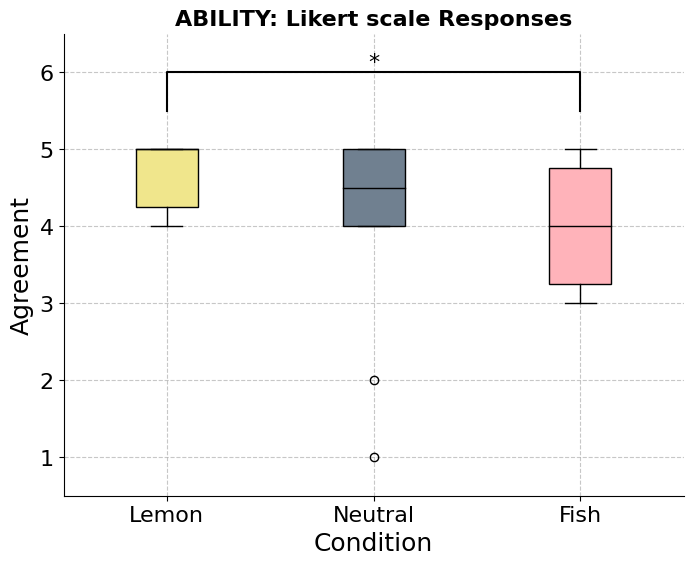

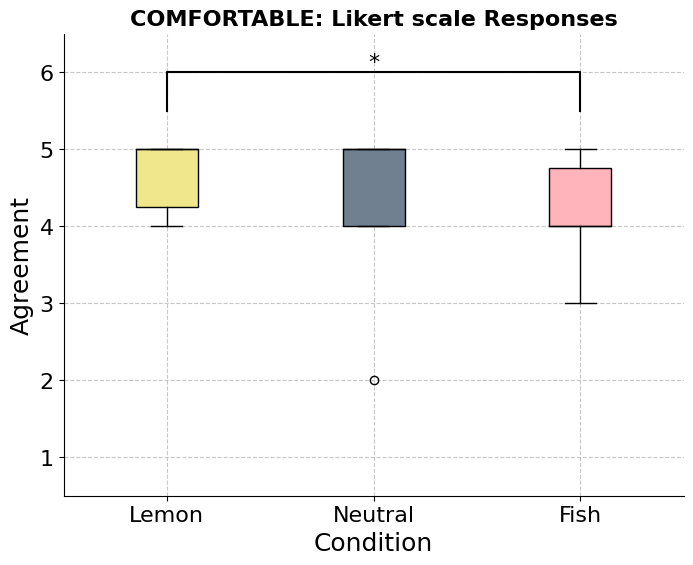

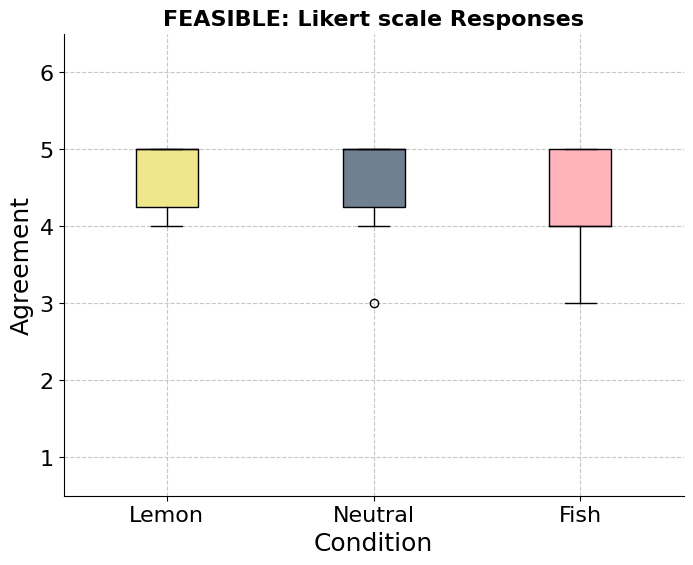

In [5]:
data_ability = {
    'fish' : [3, 3, 3, 4, 4, 4, 4, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [1, 2, 4, 4, 4, 5, 5, 5, 5, 5]
}

data_comfortable = {
    'fish': [3, 3, 4, 4, 4, 4, 4, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [2, 4, 4, 4, 5, 5, 5, 5, 5, 5]
}

data_feasible = {
    'fish': [3, 3, 4, 4, 4, 4, 5, 5, 5, 5],
    'lemon': [4, 4, 4, 5, 5, 5, 5, 5, 5, 5],
    'neutral': [3, 4, 4, 5, 5, 5, 5, 5, 5, 5]
}

# Revised colors for the plot
colors = ['#F0E68C', '#708090', '#FFB3BA']  # Softer yellow for Lemon, Slate Gray for Neutral, and keeping the existing color for Fish

# Plotting function for each dataset
def plot_box_and_whisker(data, title, outfname, sig):
    plt.figure(figsize=(8, 6))
    box = plt.boxplot(
        [data['lemon'], data['neutral'], data['fish']], 
        labels=['Lemon', 'Neutral', 'Fish'], 
        patch_artist=True, 
        boxprops=dict(facecolor='lightgray', color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black')
    )

    # Set individual colors for the boxes
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    # Adding title and labels
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel("Condition", fontsize=18)
    plt.ylabel("Agreement", fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=16)

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Calculate p-value for significance between Lemon and Fish (e.g., using a t-test)
    t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

    if sig:
        # Adding the significance annotation
        x1, x2 = 1, 3  # positions for Lemon and Fish
        y, h, col = max(max(data['lemon']), max(data['fish'])) + 0.5, 0.5, 'black'
        plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, f"*", ha='center', va='bottom', fontsize=16, color=col)
        
    ax = plt.gca()
    ax.set_ylim([0.5,6.5])

    # Remove top and right spines for a cleaner look
    sns.despine()
    # plt.savefig(f"figures/likert_{outfname}.png", dpi=150)

    # Show the plot
    plt.show()

# Plotting each category
plot_box_and_whisker(data_ability, "ABILITY: Likert scale Responses", 'ability', sig=True)
plot_box_and_whisker(data_comfortable, "COMFORTABLE: Likert scale Responses", 'comfortable', sig=True)
plot_box_and_whisker(data_feasible, "FEASIBLE: Likert scale Responses", 'feasible', sig=False)

### PANAS

In [6]:
# Experimental data spreadsheet
# mood sheet
# paired t-tests?
# t - tests between 
relevant_columns = ['INIT_PANAS_POS', 'INIT_PANAS_NEG', 'FIN_PANAS_POS', 'FIN_PANAS_NEG', 'DELT_PANAS_POS', 'DELT_PANAS_NEG']
for col in relevant_columns:
    fish, lemon, neutral = make_three_group_lists(mood_data, col)
    three_lists_stats(fish, lemon, neutral, col, remove=False)

INIT_PANAS_POS
FISH: [16.0, 20.0, 27.0, 27.0, 27.0, 28.0, 29.0, 31.0, 32.0, 39.0]
LEMON: [15.0, 23.0, 25.0, 28.0, 28.0, 28.0, 34.0, 36.0, 36.0, 39.0]
NEUTRAL: [13.0, 14.0, 18.0, 22.0, 24.0, 24.0, 30.0, 31.0, 33.0, 38.0]
ANOVA F: 0.9701678060907398, P VAL: 0.39184355962049
Neutral v Fish | T-stat: -0.8813092550736676, p-val: 0.3897671802238931, Effect Size: -0.39413348070888443
Neutral v Lemon | T-stat: -1.2920583091954823, p-val: 0.21267998515671194, Effect Size: -0.577826042050908
Fish v Lemon | T-stat: -0.5268684479505129, p-val: 0.604717988456411, Effect Size: -0.23562273296343134

INIT_PANAS_NEG
FISH: [10.0, 11.0, 11.0, 12.0, 12.0, 13.0, 15.0, 16.0, 17.0, 24.0]
LEMON: [10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 16.0]
NEUTRAL: [10.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 14.0, 14.0, 19.0]
ANOVA F: 2.0061124694376518, P VAL: 0.15406937611613825
Neutral v Fish | T-stat: -0.9057952949088828, p-val: 0.3770098087829806, Effect Size: -0.40508397062314627
Neutral v Lemon | T-stat:

### FACE SELECTION

In [7]:
# Experimental data 
# mood - face selection, pre-during-post
# linear model for each participant
# compare betas over time
# line of best fit for every participant
# for each participant, collect a list of their face ratings
def make_participant_lists(df):
    
    data = {}
    for i, row in df.iterrows():
        # id = row['ID']
        group = f"{row['CONDITION']}"
        y = [row['FACE_PRE'], row['FACE_1'], row['FACE_2'], row['FACE_3'], row['FACE_POST']]
        # y = [float(el) for el in y]
        x = [1,2,3,4,5]
        # Calculate the line of best fit
        slope, intercept = np.polyfit(x, y, 1)
        
        if group in data.keys():
            data[group].append(slope)
        else:
            data[group] = [slope]
    fish = data['bad']
    lemon = data['good']
    neutral = data['neutral']
    return fish, lemon, neutral

fish, lemon, neutral = make_participant_lists(mood_data)
three_lists_stats(pd.Series(fish), pd.Series(lemon), pd.Series(neutral), 'FACE SLOPES')


FACE SLOPES
FISH: [-0.30000000000000004, -0.29999999999999954, -0.19999999999999984, -0.1000000000000001, -0.09999999999999981, -1.1976195368092883e-16, -1.1976195368092883e-16, 5.988097684046442e-17, 0.09999999999999981, 0.2999999999999999]
LEMON: [-0.6000000000000001, -0.3999999999999999, -0.2000000000000001, -1.1976195368092883e-16, -1.1976195368092883e-16, -1.1976195368092883e-16, -1.1976195368092883e-16, -1.1976195368092883e-16, -5.988097684046442e-17, 0.30000000000000016]
NEUTRAL: [-0.3000000000000003, -0.10000000000000005, -0.09999999999999999, -1.1976195368092883e-16, -1.1976195368092883e-16, -1.1976195368092883e-16, 0.0, 0.19999999999999998, 0.39999999999999997]
neutral, num elements: 7, mean: -5.551115123125783e-17, std: 0.09258200997725514, normal (above 0.5 is normal): 0.030049791559576988
lemon, num elements: 6, mean: -1.0978179087418476e-16, std: 2.2316322462394835e-17, normal (above 0.5 is normal): 2.0729139578179456e-05
fish, num elements: 9, mean: -0.09999999999999996,